# Decision Tree

In [1]:
# pip install xgboost

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew,kurtosis

from sklearn.datasets import load_breast_cancer as lbc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier,plot_tree

# import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')


In [3]:
df=lbc(as_frame=True).frame
cn=lbc().target

In [4]:
df.shape

(569, 31)

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
x,y=df.iloc[:,:-1],df.iloc[:,-1]

mnx=StandardScaler()
x_scl=mnx.fit_transform(x.values)


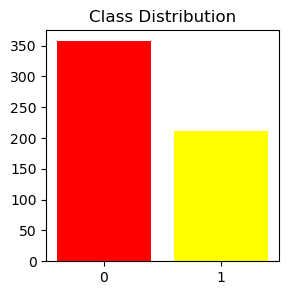

In [7]:
plt.figure(figsize=(3,3))
plt.title('Class Distribution')
plt.bar([0,1],[357,212],color=['red','yellow'],align='center')
plt.xticks([0,1])
plt.show()

In [8]:
pca=PCA(n_components=13)
X=pca.fit_transform(x_scl)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([44.27, 63.24, 72.63, 79.23, 84.73, 88.75, 91.  , 92.59, 93.98,
       95.15, 96.13, 97.  , 97.8 ])

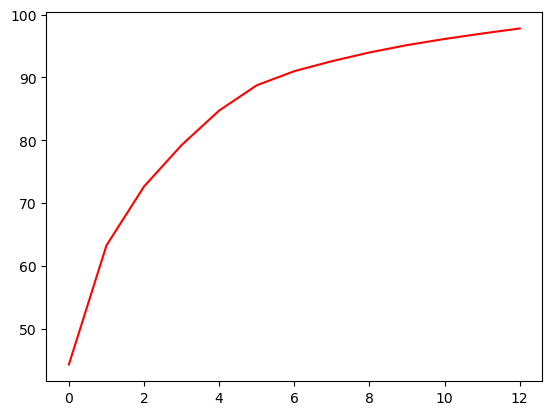

In [9]:
plt.plot(var1,color="red")
plt.show()

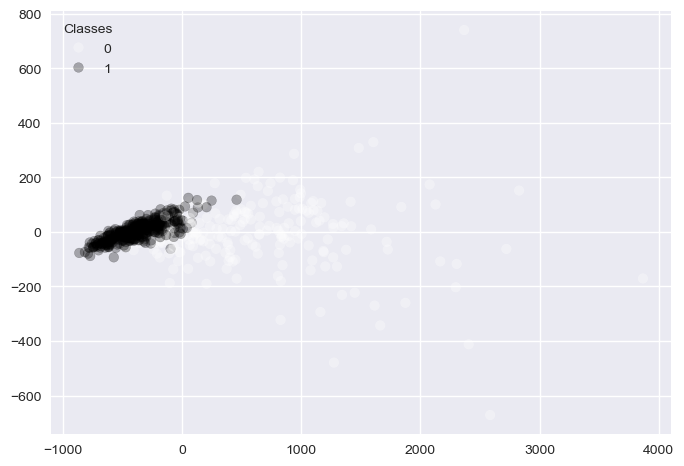

In [10]:
pca2=PCA(2)
viz=pca2.fit_transform(x.values)
viz.shape
plt.style.use('seaborn')
scatter=plt.scatter(pd.DataFrame(viz)[0],pd.DataFrame(viz)[1],c=cn,alpha=0.3)
plt.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
plt.show()

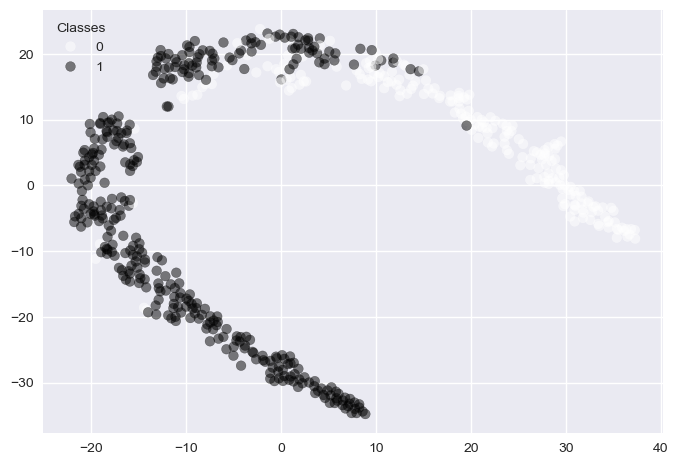

In [11]:
tsne=TSNE()
viz=tsne.fit_transform(x.values)
viz.shape
plt.style.use('seaborn')
scatter=plt.scatter(pd.DataFrame(viz)[0],pd.DataFrame(viz)[1],c=cn,alpha=0.5)
plt.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
plt.show()

In [12]:
x_tr,x_t,y_tr,y_t=train_test_split(viz,y,test_size=20,random_state=40,shuffle=True)

In [13]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=4)

In [14]:
dtc.fit(x_tr,y_tr)

DecisionTreeClassifier(max_depth=4)

In [15]:
pred=dtc.predict(x_t)
pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [16]:
from sklearn.metrics import classification_report,plot_confusion_matrix,plot_precision_recall_curve

In [17]:
print(classification_report(y_t,pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.94      0.94      0.94        16

    accuracy                           0.90        20
   macro avg       0.84      0.84      0.84        20
weighted avg       0.90      0.90      0.90        20



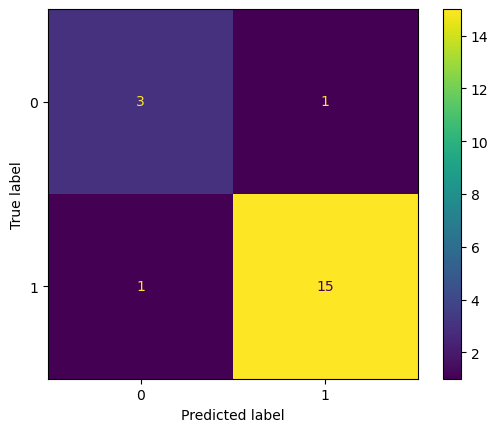

In [18]:
import matplotlib.pyplot as plt
plt.rcdefaults()
plot_confusion_matrix(dtc,x_t,y_t)
plt.show()

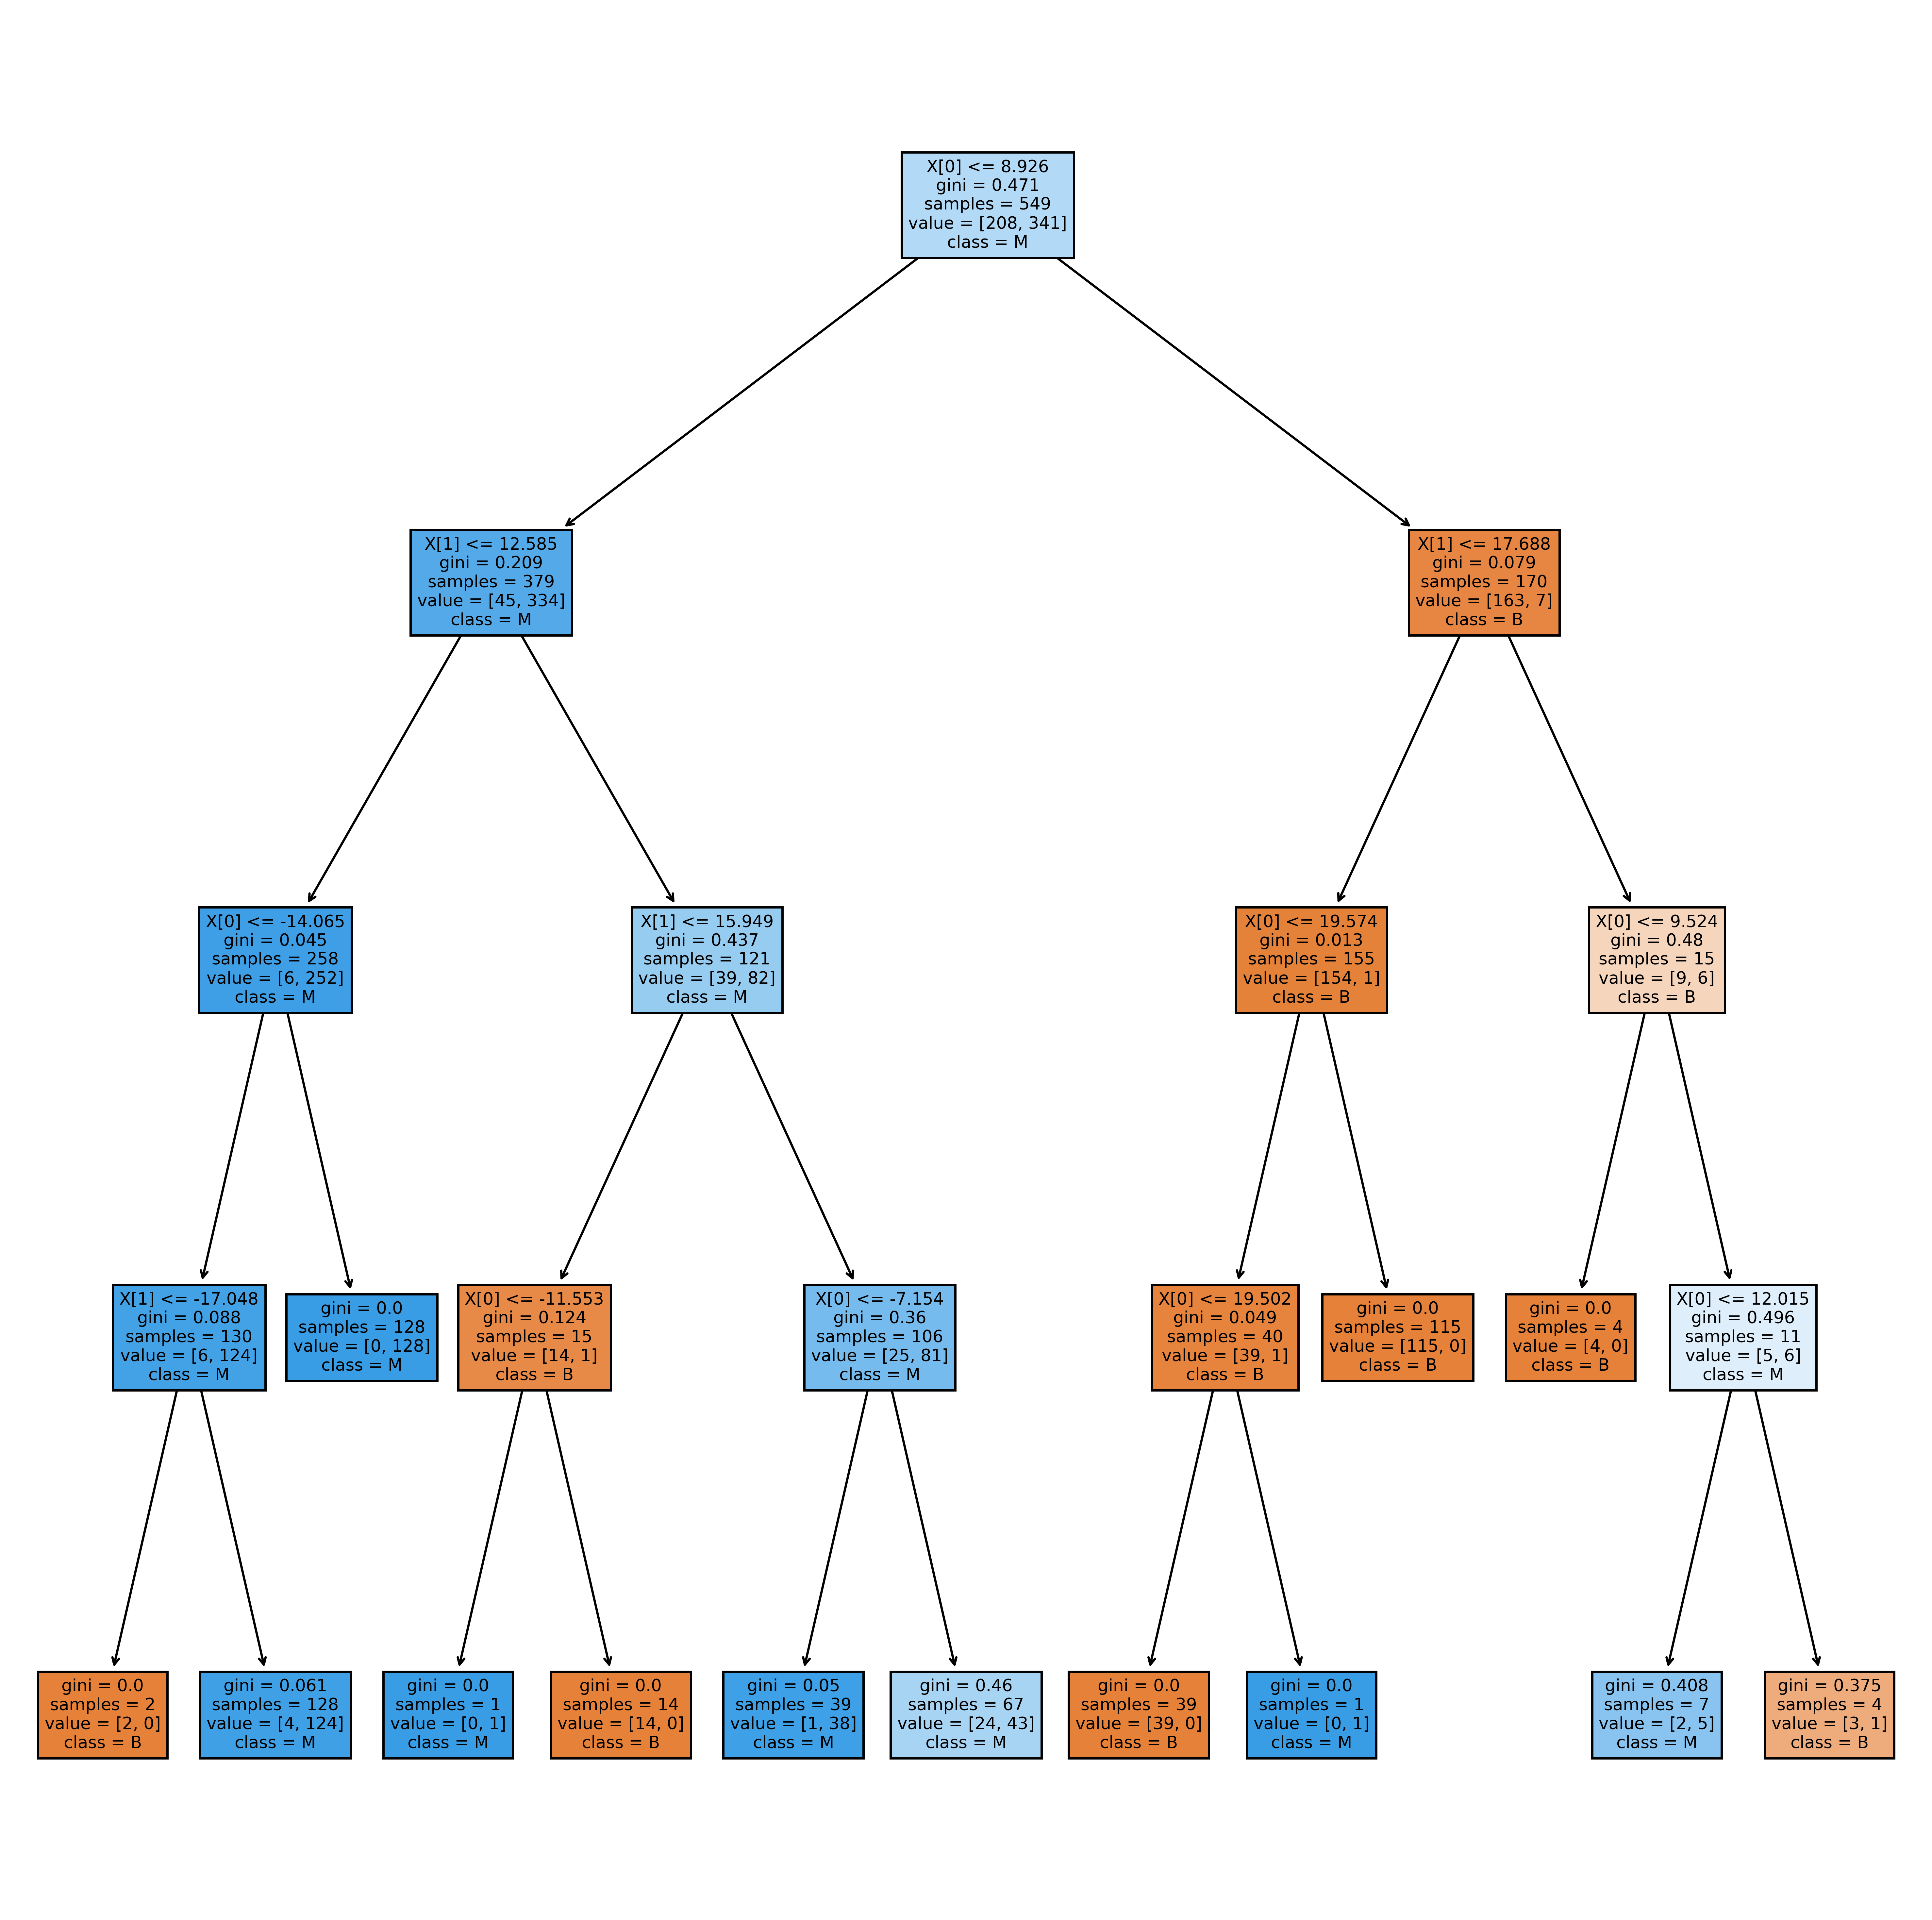

In [19]:
plt.figure(figsize=(15,15),dpi=500)
plot_tree(dtc,filled=True,class_names=['B','M'])
plt.savefig("Decision_tree.png")
plt.show()

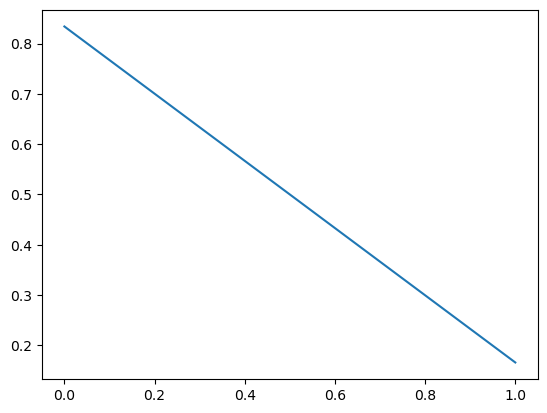

In [20]:
plt.plot(dtc.feature_importances_)
plt.show()